In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
############# THINGS TO MODIFY
datapath="/Users/zanejobe/Dropbox/20 Published papers/2019 Fryer - TDR - Thinning Rates/Seaborn/"
filename="FaciesEnvironmentData_TH_TR_Enviro"

# specify export file name
figname="Enviro_TH_TR_Lith_Data"

# import data into pandas DataFrames
df = pd.read_csv(datapath + filename + '.txt', header=None, engine='python', sep='  ', names=['th', 'tr', 'group'])


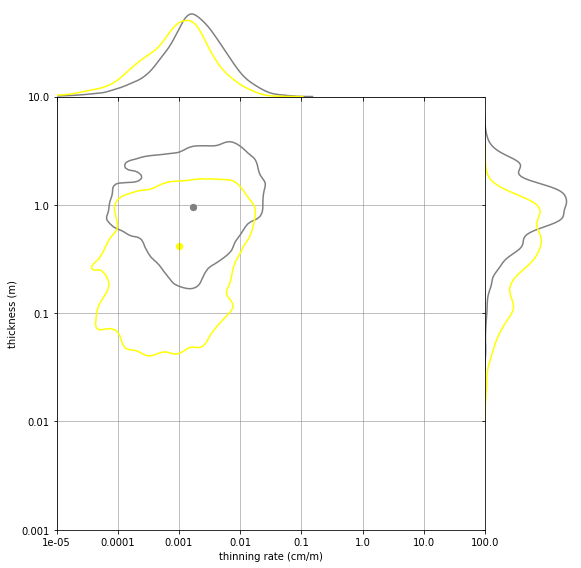

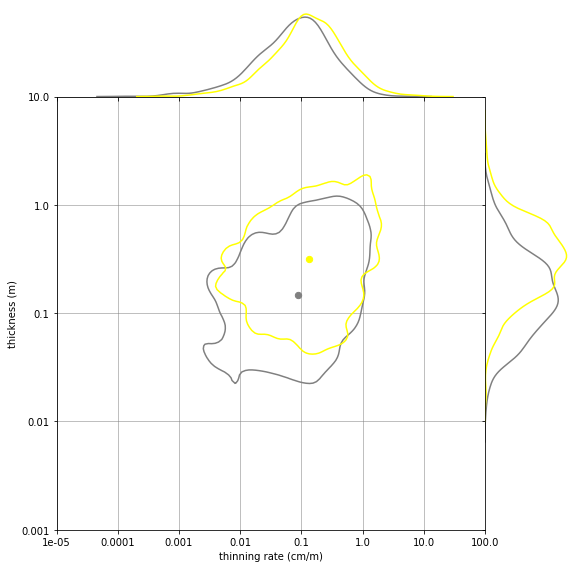

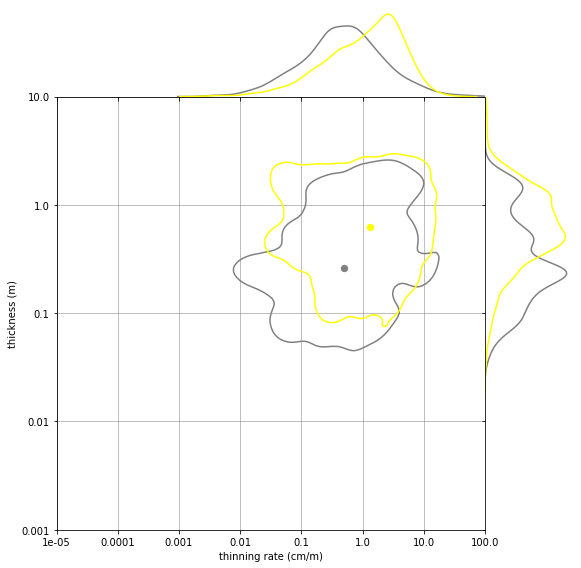

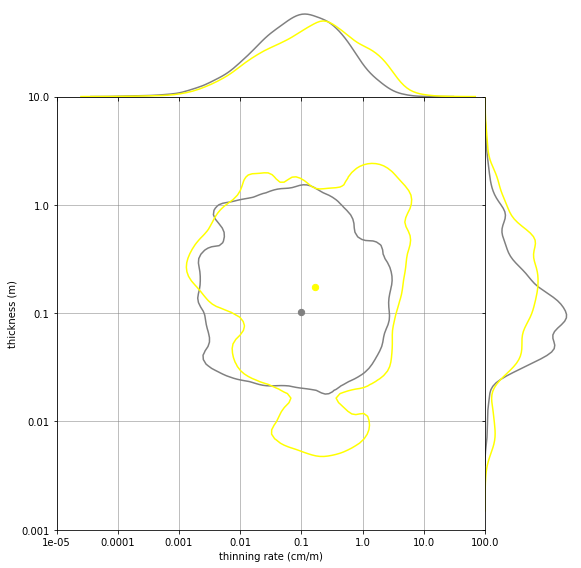

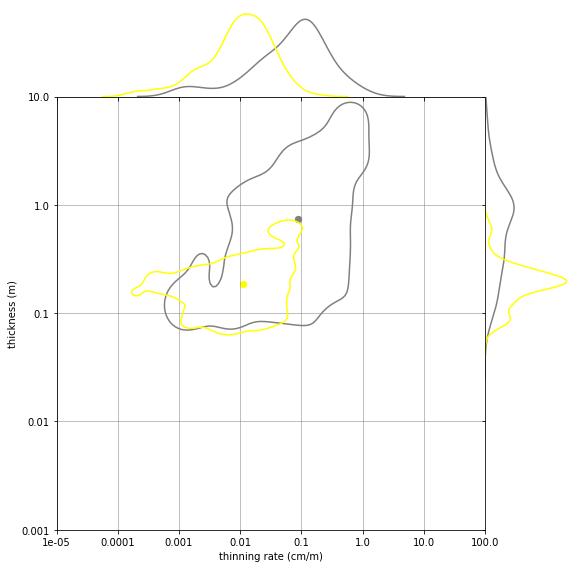

In [3]:
xlab="thinning rate (cm/m)"
ylab="thickness (m)"

colors=['grey','yellow']# mud then sand (i.e., 1 is mud basin plain, 2 is sand basin plain, 3 is mud CLTZ, etc.)
titles=['basin plain','CLTZ','channel','lobe','levee']
titleno=0
for group, values in df.groupby("group"):
    
    if group % 2 == 1: # odd
        ncolor=0
        g = sns.JointGrid("tr", "th", df, size=8, space=0)  
    else: 
        ncolor=1 # even
    
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=colors[ncolor], s=40)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)

    xlim=[-7,0]
    ylim=[-3,1]
        
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
    g.ax_joint.set_xlabel(xlab) 
    g.ax_joint.set_ylabel(ylab) 

    xtick=np.arange(xlim[0],xlim[1]+1,1)
    g.ax_joint.set_xticks(xtick) 
    xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
    xticklabel=xticklabel.astype(float)
    g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 

    ytick=np.arange(ylim[0],ylim[1]+1,1)
    g.ax_joint.set_yticks(ytick) 
    yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
    yticklabel=yticklabel.astype(float)
    g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 
    
    g.ax_joint.set_title(titles[titleno])

    if ncolor == 1:
        plt.savefig(figname + '_' + titles[titleno] + ".pdf", transparent=True)
        titleno+=1

In [5]:
# display median values for each envt
for group, values in df.groupby("group"):
    print('n=',len(values))
    print(group,np.power(10,values["tr"].median()),'thinning rate cm/m')
    print(group,np.power(10,values["th"].median())*100,'thickness cm')

    
    titles=['basin plain','CLTZ','channel','lobe','levee']

    # "group" values are: 
    # 1= basin plain mud, 
    # 2= basin plain sand, 
    # 3= CLTZ mud, 
    # 4= CLTZ sand, 
    # 5= channel mud, 
    # 6= channel sand, 
    # 7= lobe mud, 
    # 8= lobe sand, 
    # 9= levee mud, 
    # 10= levee sand, 

n= 2109
1.0 1.692626749559003e-05 thinning rate cm/m
1.0 94.62000006262767 thickness cm
n= 2363
2.0 1.0125598435711744e-05 thinning rate cm/m
2.0 41.82000014620787 thickness cm
n= 1020
3.0 0.0008675898249737773 thinning rate cm/m
3.0 14.849915930552529 thickness cm
n= 2454
4.0 0.0013344791723458697 thinning rate cm/m
4.0 31.59999980948051 thickness cm
n= 1452
5.0 0.004894089418975392 thinning rate cm/m
5.0 25.899999756606572 thickness cm
n= 3544
6.0 0.013343223175830523 thinning rate cm/m
6.0 63.00000007926501 thickness cm
n= 5522
7.0 0.0009836013134470246 thinning rate cm/m
7.0 10.199999958618957 thickness cm
n= 9062
8.0 0.00166354211445005 thinning rate cm/m
8.0 17.29999987536531 thickness cm
n= 113
9.0 0.0008903480256752592 thinning rate cm/m
9.0 74.29999935663298 thickness cm
n= 276
10.0 0.00011049196571767484 thinning rate cm/m
10.0 18.70000014913261 thickness cm
